In [29]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [30]:
df_ex = pd.read_csv('exercise.csv')
df_ex.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [31]:
df_cal = pd.read_csv('calories.csv')
df_cal.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

#### As we can see, the two datasets are related between them by the User_ID column, so we need to join the calories to the exercise dataframe

In [33]:
df = pd.merge(df_ex, df_cal, on = 'User_ID', how = 'left')
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


#### Now that we have the full dataset, let's check if there are some missing values:

In [39]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### We can see that the Gender column has object values, so we will need to encode them:

In [45]:
df.describe().T

count          mean           std         min          25%  \
User_ID     15000.0  1.497736e+07  2.872851e+06  10001159.0  12474190.75   
Age         15000.0  4.278980e+01  1.698026e+01        20.0        28.00   
Height      15000.0  1.744651e+02  1.425811e+01       123.0       164.00   
Weight      15000.0  7.496687e+01  1.503566e+01        36.0        63.00   
Duration    15000.0  1.553060e+01  8.319203e+00         1.0         8.00   
Heart_Rate  15000.0  9.551853e+01  9.583328e+00        67.0        88.00   
Body_Temp   15000.0  4.002545e+01  7.792299e-01        37.1        39.60   
Calories    15000.0  8.953953e+01  6.245698e+01         1.0        35.00   

                   50%          75%         max  
User_ID     14997285.0  17449278.75  19999647.0  
Age               39.0        56.00        79.0  
Height           175.0       185.00       222.0  
Weight            74.0        87.00       132.0  
Duration          16.0        23.00        30.0  
Heart_Rate        96.0       103.00       128.0  
Body_Temp         40.2        40.60        41.5  
Calories          79.0       138.00       314.0

#### Let's take care of the categorical value (Gender)

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])    # 1 for male, 0 for female

In [56]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

#### The User_ID has served its purpose and now it does not add any valuable information, so we can drop it:

In [59]:
df.drop('User_ID', axis = 1, inplace = True)
df.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       1   68   190.0    94.0      29.0       105.0       40.8     231.0
1       0   20   166.0    60.0      14.0        94.0       40.3      66.0
2       1   69   179.0    79.0       5.0        88.0       38.7      26.0
3       0   34   179.0    71.0      13.0       100.0       40.5      71.0
4       0   27   154.0    58.0      10.0        81.0       39.8      35.0

## Exploratory Data Analysis

#### Let's start by doing a correlation map:

Text(0.5, 1.0, 'Correlation map')

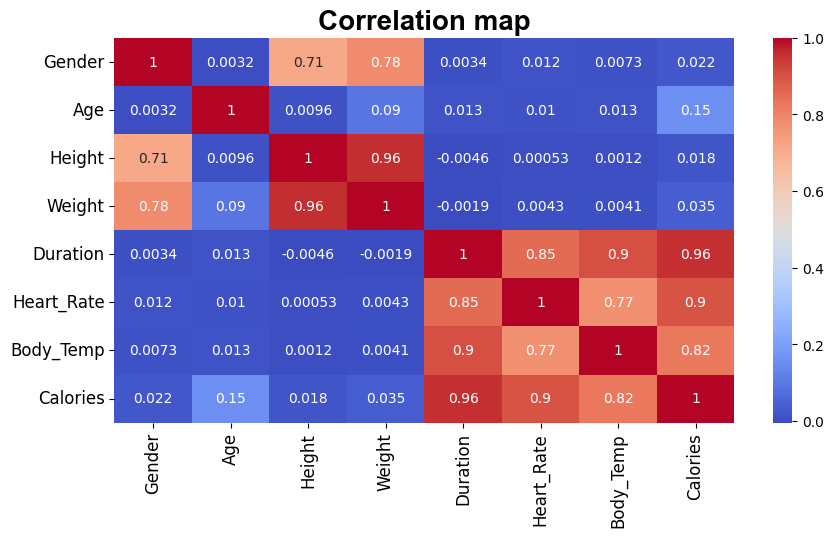

In [64]:
corr = df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### From the correlation map we learned:

#### 1. Height and Weight are heavily correlated, we will need to explore them
#### 2. Gender and Weight are also correlated.
#### 3. The same happens with Gender and Height.
#### 4. The duration of the exercise and the heart rate are correlated.
#### 5. The body temperature and the duration of the exercise are heavily correlated
#### 6. The target column (calories) present high correlations with the body temperature, the heart rate and a very high correlation with the duration of the exercise

#### Since we do not have a lot of columns, a pairplot is a good option to quickly plot this relations:

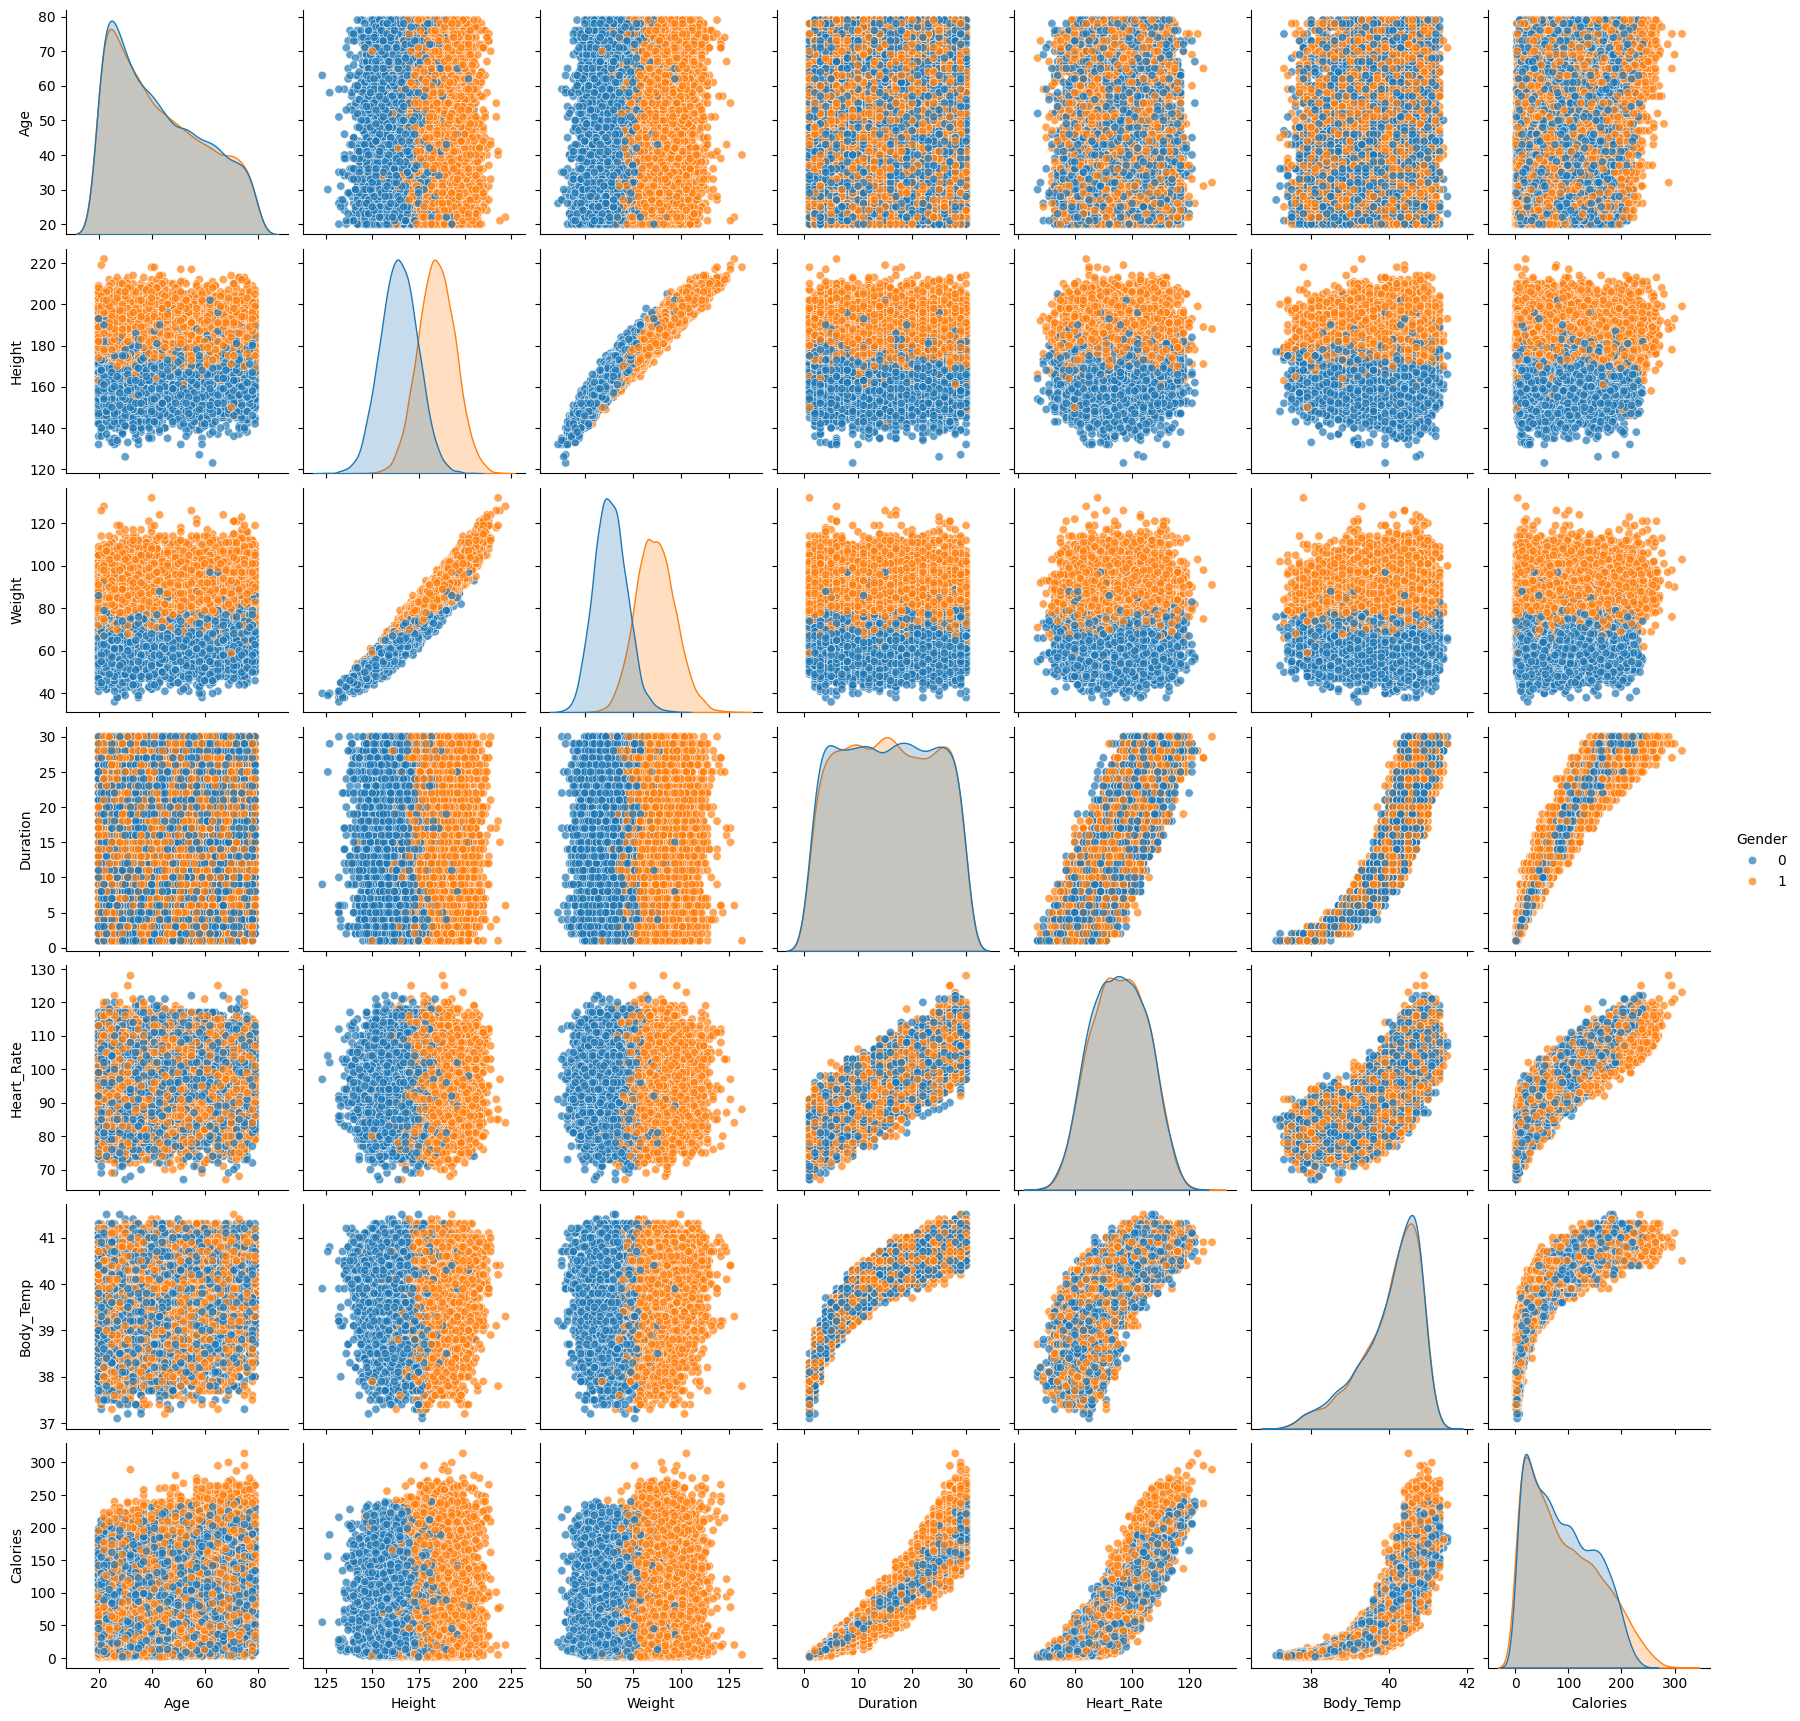

In [92]:
sns.pairplot(df, hue='Gender', diag_kind='kde', plot_kws={'alpha':0.7})
plt.show()

#### As we expected, we can see a linear correlation between height and weight. The other parameters show a non-linear dependency.

### Height vs Weight by sex

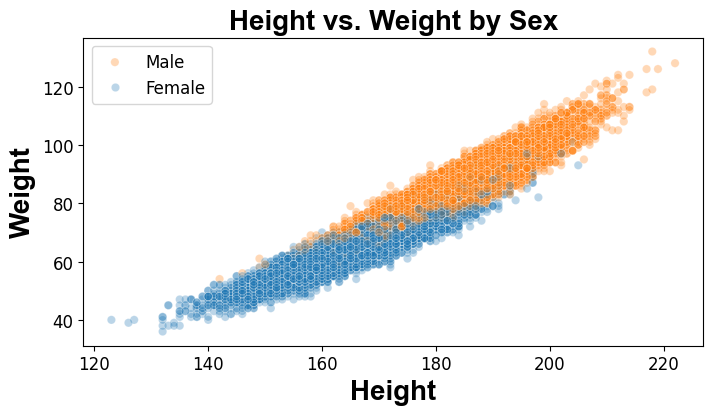

In [113]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender', alpha=0.3)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Height vs. Weight by Sex', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Height', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Weight', fontsize = 20, fontweight='bold', **csfont)
plt.legend(['Male', 'Female'], fontsize = 12, ncol =1)

#### As we can see, the higher the height, the higher the weight of the subject. Additionally, females present lower heights and weights than males.

### Duration of the exercise, heart rate and body temperature

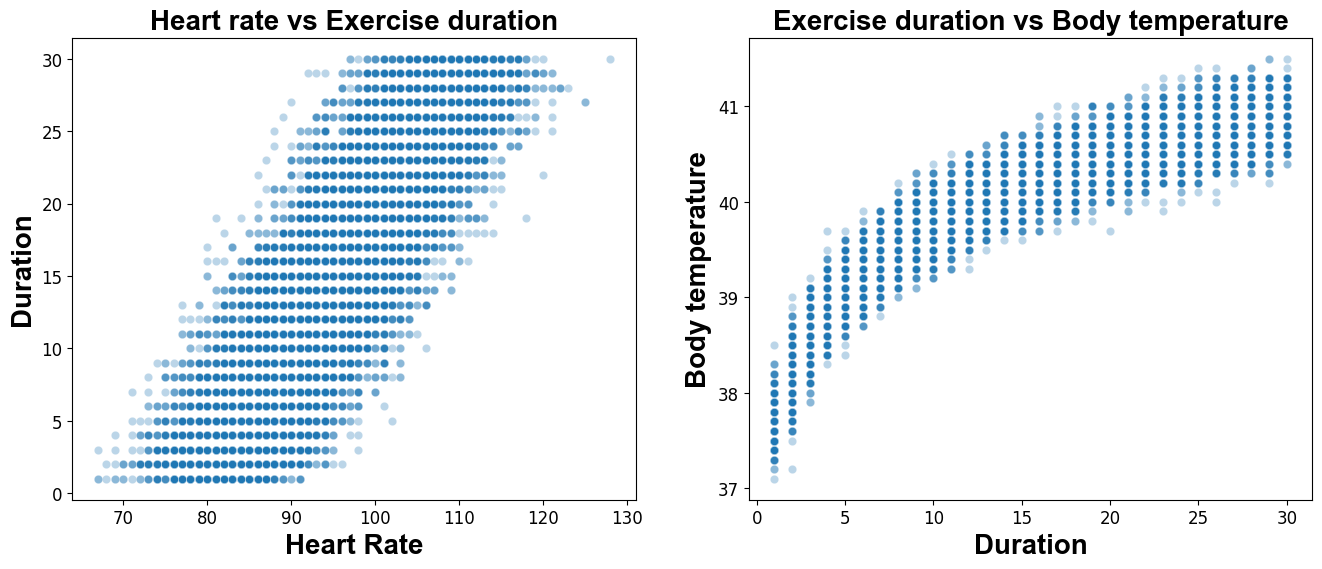

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Heart rate vs Exercise duration
sns.scatterplot(data=df, x='Heart_Rate', y='Duration', alpha=0.3, ax=ax1)
ax1.set_title('Heart rate vs Exercise duration', fontsize=20, fontweight='bold', fontname='Arial')
ax1.set_xlabel('Heart Rate', fontsize=20, fontweight='bold', fontname='Arial')
ax1.set_ylabel('Duration', fontsize=20, fontweight='bold', fontname='Arial')
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plot 2: Body temperature vs Exercise duration
sns.scatterplot(data=df, x='Duration', y='Body_Temp', alpha=0.3, ax=ax2)
ax2.set_title('Exercise duration vs Body temperature', fontsize=20, fontweight='bold', fontname='Arial')
ax2.set_xlabel('Duration', fontsize=20, fontweight='bold', fontname='Arial')
ax2.set_ylabel('Body temperature', fontsize=20, fontweight='bold', fontname='Arial')
ax2.tick_params(axis='both', which='major', labelsize=12)


#### We can se linearity in the duration of the exercise and the heart rate, but it is not defined in a small range. On the other hand, the body temperature seems to evolve following a logarithmic rate (or what is the same, the duration follows an exponential trend with the body temperature)

### Calories vs Body temp, heart rate and exercise duration

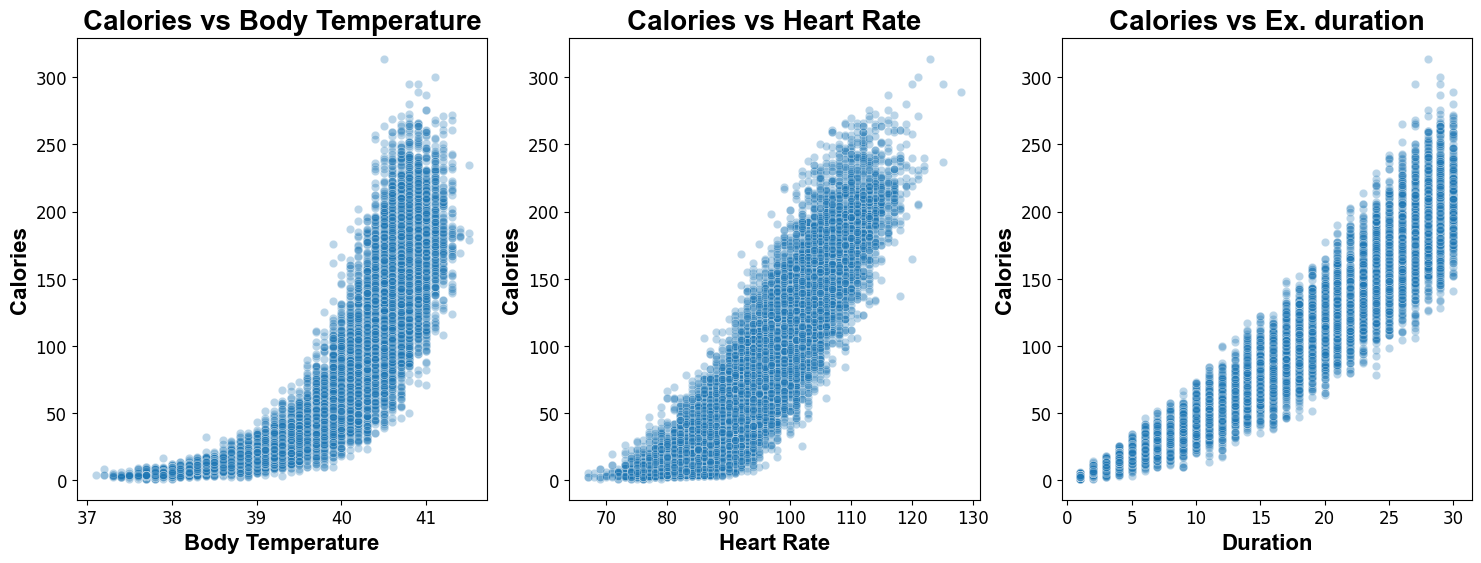

In [143]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Calories vs Body Temperature
sns.scatterplot(data=df, x='Body_Temp', y='Calories', alpha=0.3, ax=ax1)
ax1.set_title('Calories vs Body Temperature', fontsize=20, fontweight='bold', fontname='Arial')
ax1.set_xlabel('Body Temperature', fontsize=16, fontweight='bold', fontname='Arial')
ax1.set_ylabel('Calories', fontsize=16, fontweight='bold', fontname='Arial')
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plot 2: Calories vs Heart Rate
sns.scatterplot(data=df, x='Heart_Rate', y='Calories', alpha=0.3, ax=ax2)
ax2.set_title('Calories vs Heart Rate', fontsize=20, fontweight='bold', fontname='Arial')
ax2.set_xlabel('Heart Rate', fontsize=16, fontweight='bold', fontname='Arial')
ax2.set_ylabel('Calories', fontsize=16, fontweight='bold', fontname='Arial')
ax2.tick_params(axis='both', which='major', labelsize=12)

# Plot 3: Calories vs Duration
sns.scatterplot(data=df, x='Duration', y='Calories', alpha=0.3, ax=ax3)
ax3.set_title('Calories vs Ex. duration', fontsize=20, fontweight='bold', fontname='Arial')
ax3.set_xlabel('Duration', fontsize=16, fontweight='bold', fontname='Arial')
ax3.set_ylabel('Calories', fontsize=16, fontweight='bold', fontname='Arial')
ax3.tick_params(axis='both', which='major', labelsize=12)

#### From this plot we can see:

#### - The calories show an exponential rate with the body temperature, reaching the highest burnings for higher body temperatures between 40 and 41 degrees in a quick jump.

#### - As the heart rate increments, the burning of calories is higher. It will be nice to have an age table and higher heart rate counts for each age, since the burning of calories experiences a peak performance range at particular rates for particular ages. It will be expected to see a scalonated-style plot

#### - The duration of the exercise is directly related with calories

#### Since the duration column present a extremely high correlation with the target column, we can drop it from the dataset in order to improve the performance of the model:

In [148]:
df.drop('Duration', axis = 1, inplace = True)
df.head()

Gender  Age  Height  Weight  Heart_Rate  Body_Temp  Calories
0       1   68   190.0    94.0       105.0       40.8     231.0
1       0   20   166.0    60.0        94.0       40.3      66.0
2       1   69   179.0    79.0        88.0       38.7      26.0
3       0   34   179.0    71.0       100.0       40.5      71.0
4       0   27   154.0    58.0        81.0       39.8      35.0

## Train/test split

In [153]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model selection

### Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
classifier_lr = LinearRegression()
classifier_lr.fit(X_train, y_train)

LinearRegression()

In [164]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import mean_absolute_error as mae

print('Training error: ', mae(y_train, classifier_lr.predict(X_train)))
print('Validation error: ', mae(y_test, lr_ypred))

Training error:  17.893460052047498
Validation error:  17.955395549078258


### Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=0)

In [221]:
rf_ypred = classifier_rf.predict(X_test)

print('Training error: ', mae(y_train, classifier_rf.predict(X_train)))
print('Validation error: ', mae(y_test, rf_ypred))

Training error:  6.2508333333333335
Validation error:  17.078333333333333


#### The low training error and the high validation error implies that the model is overfitting the test data. 

### Lasso

In [166]:
from sklearn.linear_model import Lasso
classifier_lss = Lasso()
classifier_lss.fit(X_train, y_train)

Lasso()

In [168]:
lss_ypred = classifier_lss.predict(X_test)

print('Training error: ', mae(y_train, classifier_lss.predict(X_train)))
print('Validation error: ', mae(y_test, lss_ypred))

Training error:  17.92080805922717
Validation error:  17.967371791385016


### Ridge

In [170]:
from sklearn.linear_model import Ridge
classifier_rd = Ridge()
classifier_rd.fit(X_train, y_train)

Ridge()

In [172]:
rd_ypred = classifier_rd.predict(X_test)

print('Training error: ', mae(y_train, classifier_rd.predict(X_train)))
print('Validation error: ', mae(y_test, rd_ypred))

Training error:  17.893526750229608
Validation error:  17.95536545958898


### Elastic Net

In [174]:
from sklearn.linear_model import ElasticNet
classifier_en = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
classifier_en.fit(X_train, y_train)

ElasticNet()

In [176]:
en_ypred = classifier_en.predict(X_test)

print('Training error: ', mae(y_train, classifier_en.predict(X_train)))
print('Validation error: ', mae(y_test, en_ypred))

Training error:  21.314851805109793
Validation error:  20.972854788612832
